In [400]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math

In [401]:
df=pd.read_csv('/content/drive/MyDrive/projects/Google_playstore/googleplaystore.csv')

In [402]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [403]:
df.shape

(10841, 13)

In [404]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [405]:
df['Rating'].mean()

4.193338315362443

In [406]:
#Filling Missing Value of rate
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

<ipython-input-406-65b137d7f625>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





As we were having 1474 null values in rating we will fill null values by mean because it provides a central tendency or average of the available data.

In [407]:
df['Category'].value_counts()

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [408]:
df['Category']=df['Category'].str.replace('1.9','Family')

In [409]:
#Category wrt to ratings
cat_rate=df.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index().head(10)

In [410]:
cat_rate

,Category,Rating
0,Family,19.000000
1,EDUCATION,4.387778
2,EVENTS,4.363647
3,ART_AND_DESIGN,4.350462
4,BOOKS_AND_REFERENCE,4.311026
5,PERSONALIZATION,4.307603
6,GAME,4.282506
7,PARENTING,4.282223
8,HEALTH_AND_FITNESS,4.266296
9,BEAUTY,4.260882


In [411]:
px.bar(cat_rate, x='Category',y='Rating')

From this we can understand that ratings for Family category is max

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [413]:
df['Reviews'].value_counts()

,count
Reviews,
0,596
1,272
2,214
3,175
4,137
...,...
342912,1
4272,1
5517,1


In [414]:
df['Type'].value_counts()

,count
Type,
Free,10039
Paid,800
0,1


In [415]:
df['Type'].fillna('Free',inplace=True)

<ipython-input-415-3b53ef3ff30c>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [416]:
df['Type']=df['Type'].str.replace('0','Free')

In [417]:
df['Type'].value_counts()

,count
Type,
Free,10041
Paid,800


In [418]:
# Get the top 10 categories based on the count of their occurrences.
top_10_categories = df['Category'].value_counts().head(10).index

In [419]:
# Filter the DataFrame to include only the top 10 categories.
df_top_10 = df[df['Category'].isin(top_10_categories)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'BUSINESS'),
  Text(1, 0, 'COMMUNICATION'),
  Text(2, 0, 'LIFESTYLE'),
  Text(3, 0, 'GAME'),
  Text(4, 0, 'FAMILY'),
  Text(5, 0, 'MEDICAL'),
  Text(6, 0, 'SPORTS'),
  Text(7, 0, 'TOOLS'),
  Text(8, 0, 'PERSONALIZATION'),
  Text(9, 0, 'PRODUCTIVITY')])

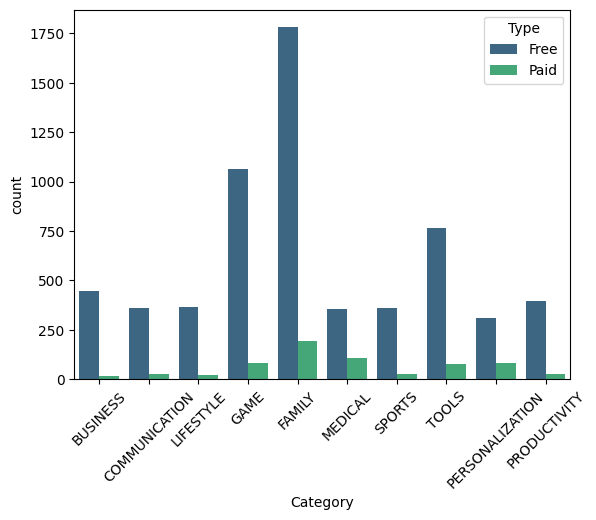

In [420]:
sns.countplot(data = df_top_10 , x = 'Category' ,hue ='Type',palette='viridis')
plt.xticks(rotation=45)

The graph shows more free apps than paid ones. The 'FAMILY' category has many free and paid apps.

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [422]:
df['Content Rating'].value_counts()

,count
Content Rating,
Everyone,8714
Teen,1208
Mature 17+,499
Everyone 10+,414
Adults only 18+,3
Unrated,2


In [423]:
df['Content Rating'].fillna('Everyone',inplace=True)

<ipython-input-423-6b75ea500558>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [424]:
df['Current Ver'].value_counts()

,count
Current Ver,
Varies with device,1459
1.0,809
1.1,264
1.2,178
2.0,151
...,...
1.0.17.3905,1
15.1.2,1
4.94.19,1


In [425]:
df['Current Ver'].ffill(inplace=True)

<ipython-input-425-843472bb11d9>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [426]:
df['Android Ver'].ffill(inplace=True)

<ipython-input-426-b17957696285>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [428]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5508,AQ Guards,PRODUCTIVITY,4.193338,0,3.2M,10+,Free,0,Everyone,Productivity,"July 6, 2018",2.1.22,4.4 and up


In [429]:
df['Last Updated']=pd.to_datetime(df['Last Updated'],errors='coerce')

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  object        
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.1+ MB


In [431]:
df.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6716,Bullshit! (Free),GAME,2.4,45,4.1M,"10,000+",Free,0,Teen,Card,2016-08-26,1.1,4.1 and up
5700,AV HD Video Player,FAMILY,3.8,6,23M,"1,000+",Free,0,Everyone,Entertainment,2018-01-19,1.0,4.4 and up
292,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,2018-04-02,Varies with device,Varies with device


In [432]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [433]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)

In [434]:
df['Size']=df['Size'].str.replace('k','e-3')

In [435]:
df['Size'] = df['Size'].str.replace('M', '')

In [436]:
df['Size']=df['Size'].str.replace(',',"")

In [437]:
df['Size']=df['Size'].str.replace("+","")

In [438]:
df['Size'] = pd.to_numeric(df['Size'])

In [439]:
df['Size'].value_counts()

,count
Size,
11.000,198
12.000,196
14.000,194
13.000,191
15.000,184
...,...
0.429,1
0.200,1
0.460,1


In [440]:
df['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [441]:
bins = [0, 10, 20, 50, 100, float('inf')]  # Ranges: 0-10, 10-20, 20-50, 50-100, 100+
labels = ['0-10 MB', '10-20 MB', '20-50 MB', '50-100 MB', '100+ MB']

In [442]:
df['Size Range'] = pd.cut(df['Size'], bins=bins, labels=labels)

In [443]:
df['Size Range'].value_counts()

,count
Size Range,
0-10 MB,4060
20-50 MB,2313
10-20 MB,1698
50-100 MB,1074
100+ MB,1


In [444]:
df.drop(columns='Size',inplace=True)

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Installs        10841 non-null  object        
 5   Type            10841 non-null  object        
 6   Price           10841 non-null  object        
 7   Content Rating  10841 non-null  object        
 8   Genres          10841 non-null  object        
 9   Last Updated    10840 non-null  datetime64[ns]
 10  Current Ver     10841 non-null  object        
 11  Android Ver     10841 non-null  object        
 12  Size Range      9146 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), object(10)
memory usage: 1.0+ MB


In [446]:
df['Last Updated'].value_counts()

,count
Last Updated,
2018-08-03,326
2018-08-02,304
2018-07-31,294
2018-08-01,285
2018-07-30,211
...,...
2015-03-08,1
2015-03-25,1
2013-12-17,1


In [447]:
df['Last Updated'].ffill(inplace=True)

<ipython-input-447-ec969191b264>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [448]:
df['Year']=df['Last Updated'].dt.year

In [449]:
year_install=df.groupby('Year')['Installs'].size().reset_index()

In [450]:
#Year vs Installs
px.bar(year_install,x='Year',y='Installs')

In the year 2018 there are more number of installation

In [451]:
#Year vs Rating
year_rating=df.groupby('Year')['Rating'].mean().reset_index()

In [452]:
px.bar(year_rating,x='Year',y='Rating')

In the year 2018 the avg rating was higher

In [453]:
#null_year_rows=df[df['Year'].isnull()]
#display(null_year_rows)

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Installs        10841 non-null  object        
 5   Type            10841 non-null  object        
 6   Price           10841 non-null  object        
 7   Content Rating  10841 non-null  object        
 8   Genres          10841 non-null  object        
 9   Last Updated    10841 non-null  datetime64[ns]
 10  Current Ver     10841 non-null  object        
 11  Android Ver     10841 non-null  object        
 12  Size Range      9146 non-null   category      
 13  Year            10841 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(1), int32(1

In [455]:
df.sample(3)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Range,Year
1192,Simple Recipes,FOOD_AND_DRINK,4.7,3803,"500,000+",Free,0,Everyone,Food & Drink,2018-02-22,1.6,4.0 and up,10-20 MB,2018
2414,LTC AS Legal,MEDICAL,4.0,6,100+,Paid,$39.99,Everyone,Medical,2018-04-04,3.0.1,4.1 and up,0-10 MB,2018
4446,The Maze Runner,GAME,4.0,428268,"10,000,000+",Free,0,Everyone,Action,2015-09-14,1.8.1,2.3 and up,20-50 MB,2015


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Installs        10841 non-null  object        
 5   Type            10841 non-null  object        
 6   Price           10841 non-null  object        
 7   Content Rating  10841 non-null  object        
 8   Genres          10841 non-null  object        
 9   Last Updated    10841 non-null  datetime64[ns]
 10  Current Ver     10841 non-null  object        
 11  Android Ver     10841 non-null  object        
 12  Size Range      9146 non-null   category      
 13  Year            10841 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(1), int32(1

In [457]:
def install(text):
  if text=='Free'or text=='0+' or text=='0' or text=='1+' or text=='5+' or text=='50+' or text == '500+' or text=='10+' or text=='5,000+'or text=='100+' or text=='1,000+':
    return "10,000-"
  elif text=='10,000+':
    return '10,000+'
  elif text=='50,000+' or text=='100,000+':
    return '50,000+'
  elif text=='5,000,000+'or text=='1,000,000+':
    return "1,000,000+"
  elif text== '50,000,000+'or text=='10,000,000+':
    return "10,000,000+"
  elif text=='500,000,000+'or text=='1,000,000,000+':
    return '500,000,000+'
  else:
    return '100,000,000+'

In [458]:
df['Installs'] = df['Installs'].apply(install)

In [459]:
df['Installs'].value_counts()

,count
Installs,
"10,000-",3189
"1,000,000+",2331
"50,000+",1648
"10,000,000+",1541
"10,000+",1054
"100,000,000+",948
"500,000,000+",130


In [460]:
#Content Rating wrt to Installs
content_rating_installs = df.groupby('Content Rating')['Installs'].size().reset_index()

In [461]:
content_rating_installs

,Content Rating,Installs
0,Adults only 18+,3
1,Everyone,8715
2,Everyone 10+,414
3,Mature 17+,499
4,Teen,1208
5,Unrated,2


In [462]:
px.bar(content_rating_installs,x='Content Rating',y='Installs')

In [463]:
# Categorys wrt to Installs
cat_installs = df.groupby('Category')['Installs'].size().sort_values(ascending=False).reset_index().head(10)

In [464]:
px.bar(cat_installs,x='Category',y='Installs')

The 'Family' category contains the most apps in the dataset, spanning across various installation groups, followed by the 'Game' category.


In [465]:
df.sample(3)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Range,Year
8955,DV ASSIST,FAMILY,5.000000,1,"10,000-",Free,0,Everyone,Education,2018-08-02,1.0,4.4 and up,10-20 MB,2018
5247,AJ AUTO,AUTO_AND_VEHICLES,4.193338,0,"10,000-",Free,0,Everyone,Auto & Vehicles,2017-02-27,1.0.0,4.0.3 and up,0-10 MB,2017
587,Mingle - Online Dating App to Chat & Meet People,DATING,4.100000,15081,"1,000,000+",Free,0,Mature 17+,Dating,2018-07-26,4.7.6,4.1 and up,20-50 MB,2018


In [466]:
df['Price'].value_counts()

,count
Price,
0,10040
$0.99,148
$2.99,129
$1.99,73
$4.99,72
...,...
$1.75,1
$14.00,1
$4.85,1


In [467]:
df['Price']=df['Price'].str.replace('$', '').str.replace('Everyone', '0').astype('float')

In [468]:
df['Price'].value_counts()

,count
Price,
0.00,10041
0.99,148
2.99,129
1.99,73
4.99,72
...,...
19.90,1
1.75,1
14.00,1


In [469]:
df['Price']=round(df['Price']*85.39).astype('int')

In [470]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Range,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10-20 MB,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"100,000,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,10-20 MB,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"1,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0-10 MB,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"10,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,20-50 MB,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"50,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0-10 MB,2018


In [471]:
#Content Rating wrt to Price
content_rating_price = df.groupby('Content Rating')['Price'].sum().reset_index()
content_rating_price

,Content Rating,Price
0,Adults only 18+,0
1,Everyone,871475
2,Everyone 10+,13381
3,Mature 17+,10087
4,Teen,56039
5,Unrated,0


In [472]:
#Size wrt to Price
size_price = df.groupby('Size Range')['Price'].sum().reset_index()
size_price

<ipython-input-472-5cd7e2a094d1>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Size Range,Price
0,0-10 MB,612633
1,10-20 MB,51251
2,20-50 MB,230035
3,50-100 MB,30964
4,100+ MB,0


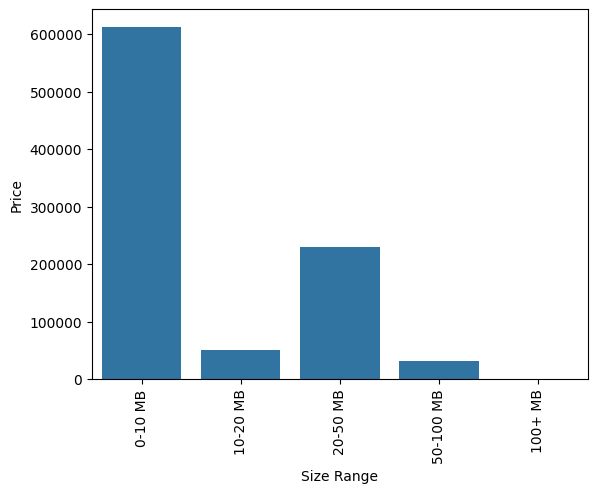

In [473]:
sns.barplot(data = size_price,x='Size Range',y='Price')
plt.xticks(rotation=90)
plt.show()

In [474]:
df['Genres'].value_counts().head(10)

,count
Genres,
Tools,842
Entertainment,623
Education,549
Medical,463
Business,460
Productivity,424
Sports,398
Personalization,392
Communication,387


In [475]:
# Genres wrt to Price
price_genres=df.groupby('Genres')['Price'].sum().reset_index().head(10)

In [476]:
price_genres

,Genres,Price
0,Action,7111
1,Action;Action & Adventure,766
2,Adventure,4602
3,Adventure;Action & Adventure,852
4,Adventure;Brain Games,255
5,Adventure;Education,0
6,Arcade,4257
7,Arcade;Action & Adventure,1449
8,Arcade;Pretend Play,0
9,Art & Design,510


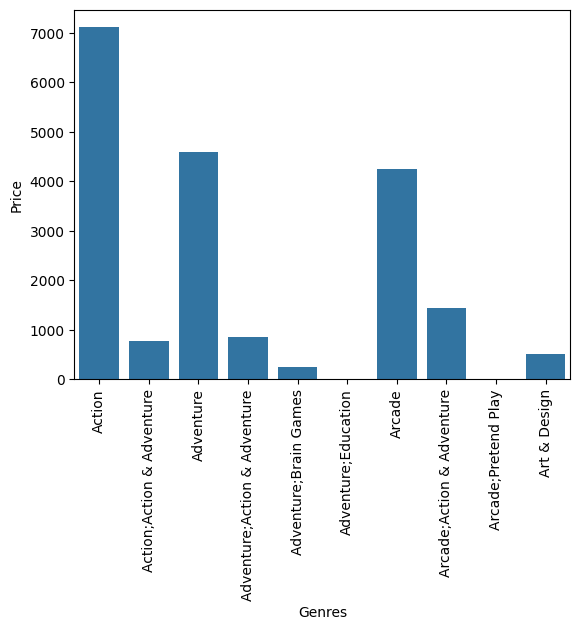

In [477]:
sns.barplot(data = price_genres,x='Genres',y='Price')
plt.xticks(rotation=90)
plt.show()

In [478]:
df['Current Ver'].value_counts().head(10)

,count
Current Ver,
Varies with device,1460
1.0,810
1.1,265
1.2,178
2.0,151
1.3,145
1.0.0,136
1.0.1,119
1.4,88


In [479]:
df['Android Ver'].value_counts().head(10)

,count
Android Ver,
4.1 and up,2451
4.0.3 and up,1503
4.0 and up,1375
Varies with device,1362
4.4 and up,980
2.3 and up,652
5.0 and up,602
4.2 and up,394
2.3.3 and up,281


In [480]:
df.to_csv('Cleandata.csv')

In [481]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Range,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10-20 MB,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"100,000,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,10-20 MB,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"1,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0-10 MB,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"10,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,20-50 MB,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"50,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0-10 MB,2018


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Installs        10841 non-null  object        
 5   Type            10841 non-null  object        
 6   Price           10841 non-null  int64         
 7   Content Rating  10841 non-null  object        
 8   Genres          10841 non-null  object        
 9   Last Updated    10841 non-null  datetime64[ns]
 10  Current Ver     10841 non-null  object        
 11  Android Ver     10841 non-null  object        
 12  Size Range      9146 non-null   category      
 13  Year            10841 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(1), int32(1

In [483]:
['Rating','Price','Year']

['Rating', 'Price', 'Year']